In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import keras
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

directory = 'wasp-waisted'
waspWaisted = {}

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    waspWaisted[filename] = array

print(waspWaisted)

directory = 'gooseneck'
gooseneck = {}

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    gooseneck[filename] = array


directory = 'regular'
regular = {}
count = 1
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    regular[filename] = array
    count = count + 1
print(count)



combined_dict = {k: v for d in (waspWaisted, gooseneck, regular) for k, v in d.items()}
X = np.array([v for v in combined_dict.values()])
X.shape

Reading file: wasp-waisted\9H-N14N_Hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\A01-0059_Sequence_KZ - 1_Loops_corrected.dat
Reading file: wasp-waisted\AH114_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\AH90_Sequence_31 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-07F_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-35E_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-37aA_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\CDJ3A - 1_Loops_corrected.dat
Reading file: wasp-waisted\Grav1-2B - 1_corrected.dat
Reading file: wasp-waisted\Grav2-1H - 1_corrected.dat
Reading file: wasp-waisted\GS10_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS1_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS2_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS3_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS4_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS5_hyst - 1_Loops_corre

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: wasp-waisted\TQ35_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ35_Loops_corrected.dat
Reading file: wasp-waisted\TQ36_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ37_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ38_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ38_Loops_corrected.dat
Reading file: wasp-waisted\TQ39_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ41_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ42_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ43_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ44_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ46H_Loops_corrected.dat
Reading file: wasp-waisted\TQ47A_Loops_corrected.dat
Reading file: wasp-waisted\TQ47H_Loops_corrected.dat
Reading file: wasp-waisted\TQ48A_Loops_corrected.dat
Reading file: wasp-waisted\TQ48H_Loops_corrected.dat
Reading file: wasp-waisted\TQ49B_Loops_corrected.dat
Reading file: wasp-waisted\TQ54A_Loops_corrected.dat
Reading file: wasp-waisted\TQ5

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: wasp-waisted\ZK17_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK18_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK20_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\Zk21_hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK2_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK30_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK31_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK3_Hyst - 1_Loops_correction.dat
{'9H-N14N_Hyst - 1_Loops_corrected.dat': array([[-1.        ,  0.        , -0.01795364],
       [-0.99608611,  0.00294727, -0.01273965],
       [-0.99217221,  0.00801327, -0.00540627],
       ...,
       [ 0.99217221, -0.00540627,  0.00801327],
       [ 0.99608611, -0.01273965,  0.00294727],
       [ 1.        , -0.01795364,  0.        ]], shape=(512, 3)), 'A01-0059_Sequence_KZ - 1_Loops_corrected.dat': array([[-1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.96086106e-01,  0.00000000e+0

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: gooseneck\B01-36B_Sequence_3 - 1_Loops_corrected.dat
Reading file: gooseneck\FT006_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\FT009_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\FT019_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\Grav1-1A - 1_corrected.dat
Reading file: gooseneck\Grav1-1V - 1_corrected.dat
Reading file: gooseneck\Grav2-1A - 1_corrected.dat
Reading file: gooseneck\Grav2-2J - 1_corrected.dat
Reading file: gooseneck\Grav2-3B - 1_corrected.dat
Reading file: gooseneck\Grav2-3G - 1 corrected.dat
Reading file: gooseneck\GS7_hyst - 1_Loops_corrected.dat
Reading file: gooseneck\KUB3_hyst - 1_Loops_corrected.dat
Reading file: gooseneck\OU_4RS5 - 1_Loops_corrected.dat
Reading file: gooseneck\TC18_Loops_corrected.dat
Reading file: gooseneck\TC33_Loops_corrected.dat
Reading file: gooseneck\TC40_Loops_corrected.dat
Reading file: gooseneck\TC43_Loops_corrected.dat
Reading file: gooseneck\TC51_Loops_corrected.dat
Reading file: gooseneck\TC57_Loops

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\18AK001_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK002_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK004_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK005_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK008_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK009_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK015_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK016_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK018_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK019_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK020_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK022_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK029_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK030_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK037_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK051_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK053_hyst - 1_Loops_corrected.d

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\18AK084_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK088_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK093_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK094_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK095_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK099_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK108_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK109_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK110_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK111_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK112_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK116_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK123_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK127_hyst - 1_Loops_corrected.dat
Reading file: regular\19TQ011_hyst - 1_Loops_corrected.dat
Reading file: regular\19TQ017_hyst - 1_Loops_corrected.dat
Reading file: regular\19TQ024_gel_hyst - 1_Loops_correct

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\247-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\249-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\250-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\250a-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\251-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\252b-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\252nb-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\257-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\258-1_Sequence_2 - 1_Loops_corrected.dat
Reading file: regular\259-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\260-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\261-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\261a-1_Sequence-11 - 1_Loops_corrected.dat
Reading file: regular\262-1_Sequence-111 - 1_Loops_corrected.dat
Reading file: regular\269a1-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\269a2-1_Sequence11 - 1_

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\282-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\285a-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\287-1_Sequence-111 - 1_Loops_corrected.dat
Reading file: regular\287a-1_Sequence - 1_Loops_corrected.dat
Reading file: regular\287a-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\288a-1_Sequence - 1_Loops_corrected.dat
Reading file: regular\288b-1_Sequence-111 - 1_Loops_corrected.dat
Reading file: regular\289-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\9H-N04N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N07N_v2_Hyst1 - 1_Loops_corrected.dat
Reading file: regular\9H-N10N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N11N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N12N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N15N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N17_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N18N_Hyst - 1_Loops_corrected.dat
Reading file: regul

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\A01-0219_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0223_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0280_Sequence_KZ1 - 1_Loops_corrected.dat
Reading file: regular\A01-0284_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0288_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0294_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0298_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0350_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0360_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0364_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0366_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0370_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0374_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0378_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0430_Sequence_KZ - 1_Loops_correcte

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\A01-0699_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0703_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0707_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0767_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-0771_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0775_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0854_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0872_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0876_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-3979_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-3987_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4093_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-4194_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4198_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4290_Sequence_KZ - 1_Loops_cor

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\A01-4880_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4884_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-4888_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4890_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-5024_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-5028_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-5038_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-5090_Sequence_KZ - 1_Loops.dat
Reading file: regular\A01-5092_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-5094_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\AH100_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH105_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH108_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH38_Sequence_3PO - 1_Loops_corrected.dat
Reading file: regular\AH45_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\A

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: inval

Reading file: regular\AK117_Sequence_Hyst-2 - 1_Loops_corrected.dat
Reading file: regular\AK126_Sequence_Hyst - 1_Loops_corrected.dat
Reading file: regular\B01-03A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-03H_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-05A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-05F_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-08F_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-10B_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-11E_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-15A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-15G_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-16A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-16E_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-18A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-19A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\B01-37b_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-37C_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-38A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-38H_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\CDJ10J - 1_Loops_corrected.dat
Reading file: regular\CDJ4M - 1_Loops_corrected.dat
Reading file: regular\CDJ6G - 1_Loops_corrected.dat
Reading file: regular\CS10-2_hyst - 1_Loops_corrected.dat
Reading file: regular\CS10-3_hyst - 1_Loops_corrected.dat
Reading file: regular\CS11-1_hyst - 1_Loops_corrected.dat
Reading file: regular\CS11-2_hyst - 1_Loops_corrected.dat
Reading file: regular\CS14-1_hyst - 1_Loops_corrected.dat
Reading file: regular\CS14-4_hyst - 1_Loops_corrected.dat
Reading file: regular\CS16-1_hyst - 1_Loops_corrected.dat
Reading file: regular\CS16-4_hyst - 1_Loops_corrected.dat
Reading file: regular\CS2-1_hyst - 1_Loops_corrected.dat
Reading file: regular\CS2-3_hyst - 1_Loops_corrected.dat
Readi

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\Grav1-1Q - 1_corrected.dat
Reading file: regular\Grav2-2A - 1_corrected.dat
Reading file: regular\GZ10A - 1_Loops_corrected.dat
Reading file: regular\GZ10G - 1_Loops_corrected.dat
Reading file: regular\GZ11A - 1_Loops_corrected.dat
Reading file: regular\GZ11i - 1_Loops_corrected.dat
Reading file: regular\GZ12A - 1_Loops_corrected.dat
Reading file: regular\GZ12H - 1_Loops_corrected.dat
Reading file: regular\GZ13A - 1_Loops_corrected.dat
Reading file: regular\GZ13J - 1_Loops_corrected.dat
Reading file: regular\GZ14A - 1_Loops_corrected.dat
Reading file: regular\GZ14M - 1_Loops_corrected.dat
Reading file: regular\GZ15A - 1_Loops_corrected.dat
Reading file: regular\GZ15J - 1_Loops_corrected.dat
Reading file: regular\GZ16A - 1_Loops_corrected.dat
Reading file: regular\GZ16E - 1_Loops_corrected.dat
Reading file: regular\GZ17A - 1_Loops_corrected.dat
Reading file: regular\GZ17i - 1_Loops_corrected.dat
Reading file: regular\GZ7A - 1_Loops_corrected.dat
Reading file: regul

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\JZ98_Hyst - 1_Loops_corrected.dat
Reading file: regular\KUB2_hyst - 1_Loops_corrected.dat
Reading file: regular\KUB6_hyst - 1_Loops_corrected.dat
Reading file: regular\KUB8_hyst - 1_Loops_corrected.dat
Reading file: regular\KUB9-9A_hyst - 1_Loops_corrected.dat
Reading file: regular\MB12_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB2-2_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB2-6_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MCB-3_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MCB-5_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\OU_10Q - 1_Loops_corrected.dat
Reading file: regular\OU_24Q - 1_Loops_corrected.dat
Reading file: regular\OU_25Q - 1_Loops_corrected.dat
Reading file: regular\OU_48Q - 1_Loops_corrected.dat
Reading file: regular\Pb10_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\Pb13_Sequence_3 - 1_Loops_corrected.dat
Readin

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\QVB13_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB20_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB21_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB27_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB29_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB32_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\QVB5_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\TC01_Loops_corrected.dat
Reading file: regular\TC19_Loops_corrected.dat
Reading file: regular\TC35_Loops_corrected.dat
Reading file: regular\TC60_Loops_corrected.dat
Reading file: regular\TMCB15_Hyst - 1_Loops.dat
Reading file: regular\TMCB46_Hyst - 1_Loops.dat
Reading file: regular\TMCB55_Hyst - 1_Loops.dat
Reading file: regular\TMCB61_Hyst - 1_Loops.dat
Reading file: regular\TQ22_23_Loops_corrected.dat
Reading file: regular\TQ31_23_Loops_corrected.dat
Reading file: regu

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

(519, 512, 3)

In [2]:
y1 = np.full((78,1), 0)
y2 = np.full((55,1), 1)
y3 = np.full((386,1), 2)
y = np.vstack((y1, y2, y3))
y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)
y_categorical.shape

(519, 3)

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)


def create_model():
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



Fold 1
X_train shape:  (389, 512, 3)
X_test shape:  (130, 512, 3)
y_train shape:  (389, 3)
y_test shape:  (130, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7191 - loss: 0.7990 - val_accuracy: 0.7923 - val_loss: 0.7571 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7553 - loss: 0.6241 - val_accuracy: 0.8077 - val_loss: 0.6702 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7573 - loss: 0.5509 - val_accuracy: 0.8077 - val_loss: 0.5577 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8663 - loss: 0.4092 - val_accuracy: 0.7692 - val_loss: 0.5710 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8181 - loss: 0.4742 - val_accuracy: 0.8231 - val_loss: 0.4512 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8510 - loss: 0.4040 - val_accuracy: 0.8462 - val_loss: 0.4391 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8508 - loss: 0.3921 - val_accuracy

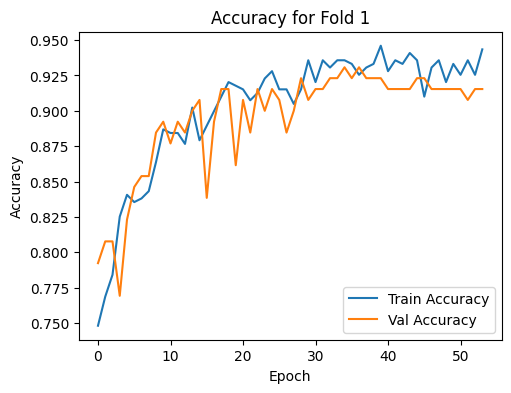

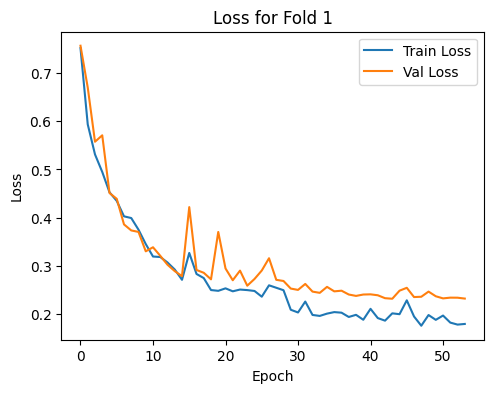

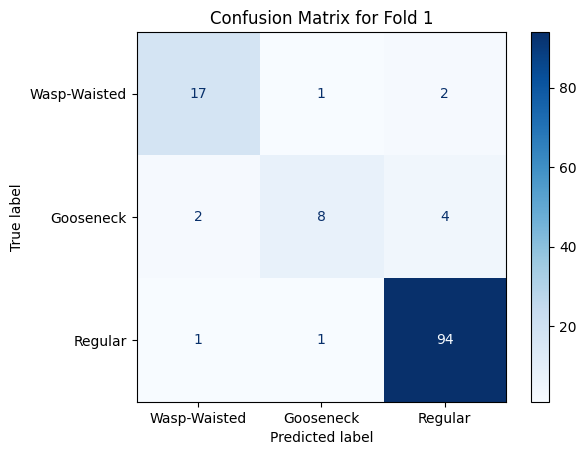

Fold 1 Accuracy: 0.9153846153846154
Fold 1 F1-score: 0.9108843537414966
Fold 1 Recall: 0.9153846153846154
Fold 1 Precision: 0.911076923076923
Fold 2
X_train shape:  (389, 512, 3)
X_test shape:  (130, 512, 3)
y_train shape:  (389, 3)
y_test shape:  (130, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6317 - loss: 1.0424 - val_accuracy: 0.7615 - val_loss: 0.5516 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7905 - loss: 0.6100 - val_accuracy: 0.8462 - val_loss: 0.5378 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7840 - loss: 0.5995 - val_accuracy: 0.8462 - val_loss: 0.5068 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8203 - loss: 0.5286 - val_accuracy: 0.8231 - val_loss: 0.4701 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8004 - loss: 0.5704 - val_accuracy: 0.8462 - val_loss: 0.4475 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8363 - loss: 0.4708 - val_accuracy: 0.8538 - val_loss: 0.4386 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8272 - loss: 0.4402 - val_accuracy

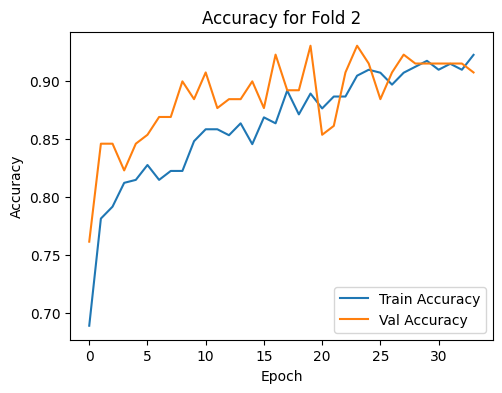

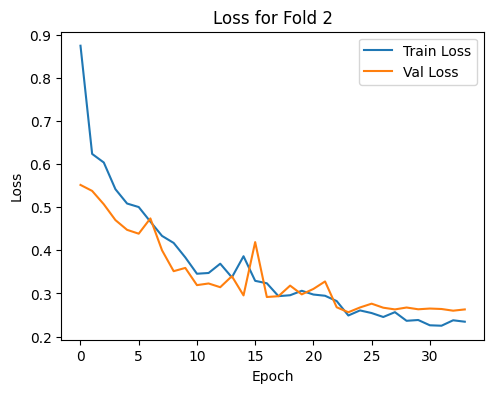

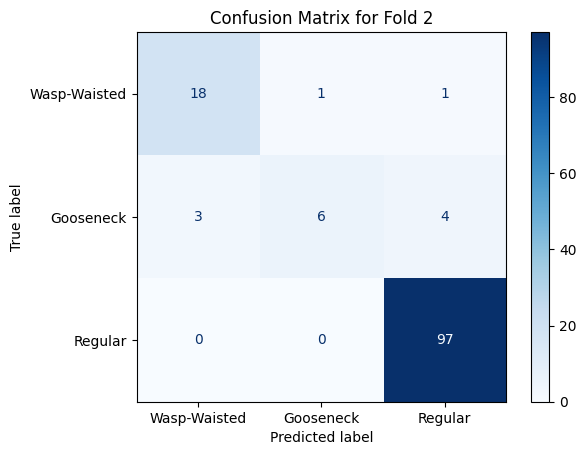

Fold 2 Accuracy: 0.9307692307692308
Fold 2 F1-score: 0.9224906898469836
Fold 2 Recall: 0.9307692307692308
Fold 2 Precision: 0.9271600948071536
Fold 3
X_train shape:  (389, 512, 3)
X_test shape:  (130, 512, 3)
y_train shape:  (389, 3)
y_test shape:  (130, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.6210 - loss: 1.0075 - val_accuracy: 0.8154 - val_loss: 0.5868 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8042 - loss: 0.5197 - val_accuracy: 0.8308 - val_loss: 0.5686 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8073 - loss: 0.5115 - val_accuracy: 0.8231 - val_loss: 0.4497 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8407 - loss: 0.4656 - val_accuracy: 0.8385 - val_loss: 0.5011 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8302 - loss: 0.4265 - val_accuracy: 0.8462 - val_loss: 0.4545 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8342 - loss: 0.4799 - val_accuracy: 0.8615 - val_loss: 0.4942 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8669 - loss: 0.4028 - val_accuracy

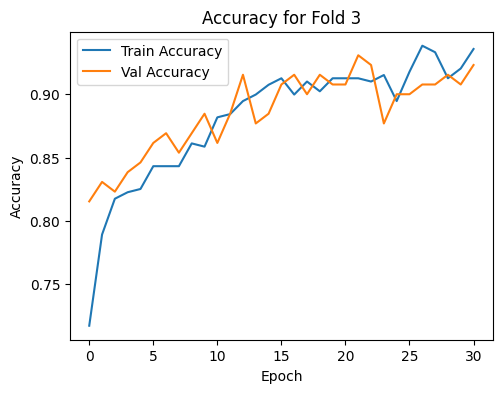

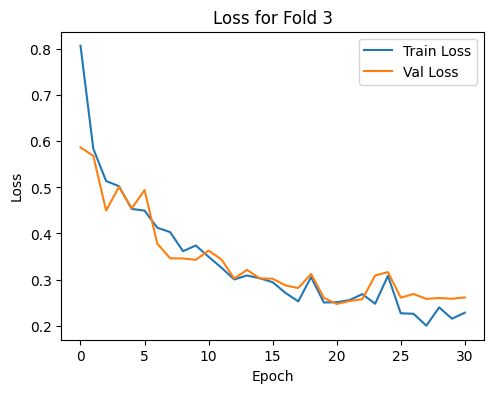

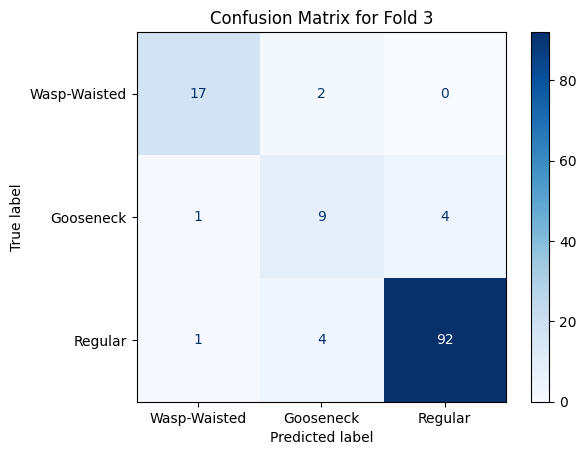

Fold 3 Accuracy: 0.9076923076923077
Fold 3 F1-score: 0.9089718393095202
Fold 3 Recall: 0.9076923076923077
Fold 3 Precision: 0.9104487179487181
Fold 4
X_train shape:  (390, 512, 3)
X_test shape:  (129, 512, 3)
y_train shape:  (390, 3)
y_test shape:  (129, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6340 - loss: 1.1093 - val_accuracy: 0.7519 - val_loss: 0.7059 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7688 - loss: 0.6756 - val_accuracy: 0.7752 - val_loss: 0.6217 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7653 - loss: 0.6222 - val_accuracy: 0.7597 - val_loss: 0.5750 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8024 - loss: 0.5725 - val_accuracy: 0.8295 - val_loss: 0.5329 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8412 - loss: 0.4778 - val_accuracy: 0.8217 - val_loss: 0.5437 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8234 - loss: 0.4940 - val_accuracy: 0.8217 - val_loss: 0.4775 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8223 - loss: 0.4948 - val_accuracy

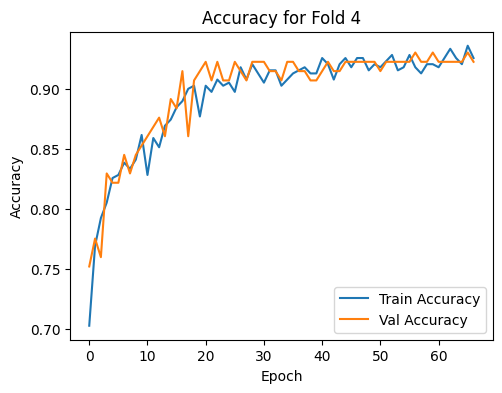

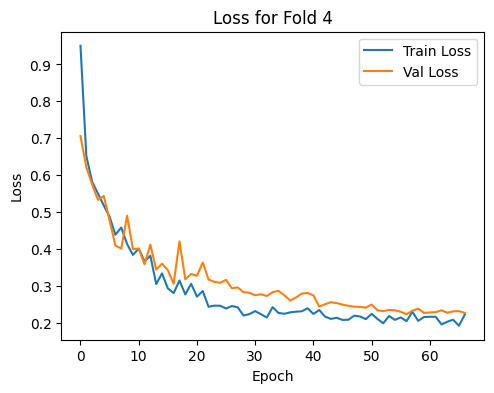

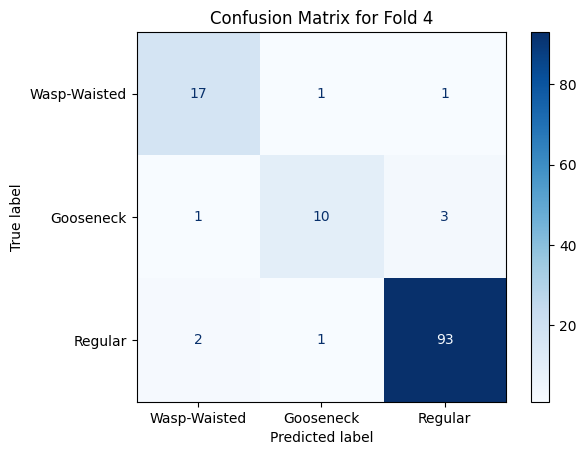

Fold 4 Accuracy: 0.9302325581395349
Fold 4 F1-score: 0.9290811476616995
Fold 4 Recall: 0.9302325581395349
Fold 4 Precision: 0.9291310370547963


In [ ]:
fold = 1
conf_matrices = []
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    print("X_train shape: ", X_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_train shape: ", y_train.shape)
    print("y_test shape: ", y_test.shape)
    model = create_model()
    
    # callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    # Training
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data = (X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy for Fold {fold}')
    plt.show

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss for Fold {fold}')
    plt.savefig(f"1-D_CNN_loss_fold_{fold}.svg", bbox_inches="tight", pad_inches=0.01)
    plt.show

    # predictions 
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrices.append(conf_matrix)

    # Plot the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Wasp-Waisted", "Gooseneck", "Regular"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.savefig(f"1-D_CNN_CM_fold_{fold}.svg", bbox_inches="tight", pad_inches=0.01)
    plt.show()

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    # Print the average scores across all folds
    print(f"Fold {fold} Accuracy: {acc}")
    print(f"Fold {fold} F1-score: {f1}")
    print(f"Fold {fold} Recall: {recall}")
    print(f"Fold {fold} Precision: {precision}")

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)

    fold += 1

In [5]:
# Print the average scores across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average F1-score: {np.mean(f1_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")

Average Accuracy: 0.9210196779964221
Average F1-score: 0.917857007639925
Average Recall: 0.9210196779964221
Average Precision: 0.9194541932218978


In [ ]:
# Create a DataFrame with metrics per fold
num_folds = len(accuracy_scores)

metrics_df = pd.DataFrame({
    "Fold": [f"Fold {i+1}" for i in range(num_folds)],
    "Accuracy": accuracy_scores,
    "F1-score": f1_scores,
    "Recall": recall_scores,
    "Precision": precision_scores
})

avg_row = {
    "Fold": "Average",
    "Accuracy": np.mean(accuracy_scores),
    "F1-score": np.mean(f1_scores),
    "Recall": np.mean(recall_scores),
    "Precision": np.mean(precision_scores)
}
metrics_df = pd.concat([metrics_df, pd.DataFrame([avg_row])], ignore_index=True)

metrics_df[["Accuracy", "F1-score", "Recall", "Precision"]] = (
    metrics_df[["Accuracy", "F1-score", "Recall", "Precision"]].round(4)
)

print(metrics_df)

      Fold  Accuracy  F1-score  Recall  Precision
0   Fold 1    0.9154    0.9109  0.9154     0.9111
1   Fold 2    0.9308    0.9225  0.9308     0.9272
2   Fold 3    0.9077    0.9090  0.9077     0.9104
3   Fold 4    0.9302    0.9291  0.9302     0.9291
4  Average    0.9210    0.9179  0.9210     0.9195


In [ ]:


def save_metrics_table_as_svg(df, filename="metrics_table.svg"):
    n_rows, n_cols = df.shape
    fig, ax = plt.subplots(figsize=(n_cols * 2.0, n_rows * 0.5 + 1))

    ax.axis("off")

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.1, 1.2)  # (x_scale, y_scale)

    plt.tight_layout()
    plt.savefig(filename, format="svg", bbox_inches="tight", pad_inches=0.05)
    plt.close(fig)
    print(f"Saved metrics table as {filename}")


save_metrics_table_as_svg(metrics_df, filename="1-D_CNN_kfold_metrics.svg")

Saved metrics table as 1-D_CNN_kfold_metrics.svg
